<h1>Rocks vs. Mines</h1>
This is a practice assignment and the requirements are fairly straightforward. If you find yourself spinning your wheels, you're probably doing something wrong! Use our handwritten digit class example as a reference

<h3>About the data</h3>
The data contains sonar signal data collected after they are bounced off two kinds of objects (underwater). The objects are either rocks or mines and the sonar signals are sent at 60 different frequencies. The value returned is then recorded. The goal of the exercise is to build a model that can figure out whether an object is a rock or a mine


<h2>Get the data</h2>

In [1]:

from sklearn.datasets import fetch_openml
sonar = fetch_openml('sonar')

/Users/reianna/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


<h2>Organize the data and create training and testing samples</h2>
<li>Use 10% of the data for testing and 90% for training (very little data!)</li>
<li>Rocks should be 1 (positive) and Mines 0 (negative)</li>
<li>X_train,X_test,y_train,y_test</li>

In [2]:
x, y = sonar['data'], sonar['target']

df = x.assign(target=y)

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.1, random_state=42)

train['y'] = (train['target'] == 'Rock')
test['y'] = (test['target'] == 'Rock')

train = train.sample(frac=1, random_state=42)

x_train = train.iloc[:, 0:60]
y_train = train['y']

x_test = test.iloc[:, 0:60]
y_test = test['y']

<h2>Fit a logisticregression model</h2>
<li>For this run, don't give any parameters to the model</li>
<li>https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html</li>

In [3]:
from sklearn.linear_model import LogisticRegression

#Create a model object. Parameters of the model object are known as hyper parameters
clf = LogisticRegression(random_state=42)

#Fit the data to the model. This estimates the model parameters 
clf.fit(x_train, y_train)

LogisticRegression(random_state=42)

<h2>Calculate precision, recall and accuracy</h2>

In [6]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

y_pred = clf.predict(x_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("precision: ", precision) 
print("recall: ",recall) 
print("accuracy: ", accuracy) 
print("\n\n")

precision:  0.8571428571428571
recall:  0.75
accuracy:  0.8571428571428571





<h2>Comment on these numbers</h2>
<li>Keep in mind that, if you need to get across the minefield, you don't want to step on a rock and then discover that it is a mine!</li>
<li>Which statistic should you focus more on, precision or accuracy?</li>
<li>What role will recall play in determining if you have a reasonable model</li>

<h4>Your comment here</h4>


<h2>Draw the precision recall curve</h2>

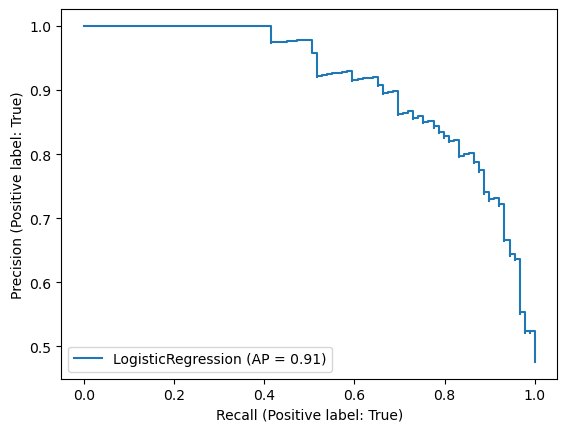

In [7]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(clf, x_train, y_train)

<h2>Draw the ROC curve</h2>

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(clf, x_test, y_test)


<h2>The solver</h2>
Logistic regression is a form of regression used to predict the class a case belongs to. In the case of binomial logistic regression, two classes are predicted (usually classified as 0 and 1 since we're dealing with numbers) and that's what we're using in our rocks and mines example

The actual regression (details at https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) is linear, of course. And linear regression is, in practice, done using one of a number of heuristic algorithms. By default, sklearn uses lbfgs (since you asked: Limited Memory Broyden–Fletcher–Goldfarb–Shanno algorithm). Since we have many independent variables (60, to be precise) another algorithm, liblinear (Library for Large Linear Classification) may be more suitable since it is designed for problems with many independent variables. You can change the algorithm by passing the solver argument to your model. Let's try that and see what we get 

<h2>Fit a new model using liblinear solver</h2>

In [8]:
from sklearn.linear_model import LogisticRegression

#Create a model object. Parameters of the model object are known as hyper parameters
clf_lib = LogisticRegression(random_state=42, solver='liblinear')

#Fit the data to the model. This estimates the model parameters 
clf_lib.fit(x_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

<h2>Calculate precision, recall, and accuracy</h2>

In [9]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

y_pred = clf_lib.predict(x_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("precision: ", precision) 
print("recall: ",recall) 
print("accuracy: ", accuracy) 
print("\n\n")

precision:  0.8333333333333334
recall:  0.625
accuracy:  0.8095238095238095





<h2>Compare these numbers with the earlier numbers</h2>

<h4>Your response here</h4>


<h2>Draw the precision recall and roc curves</h2>

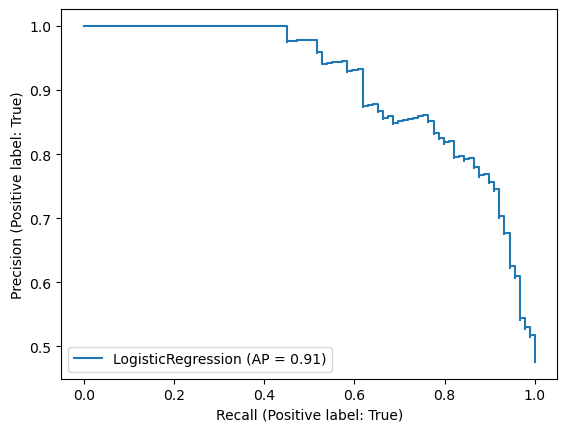

In [10]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(clf_lib, x_train, y_train)

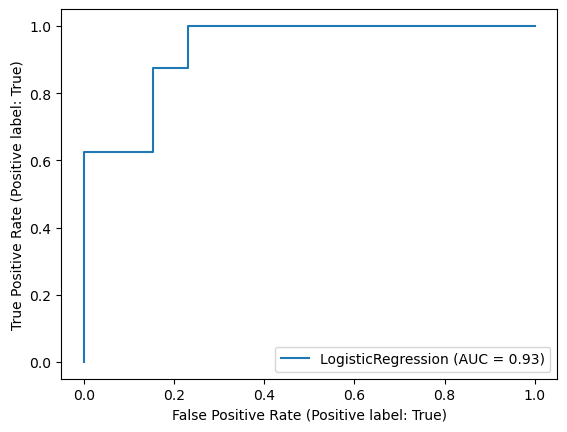

In [11]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(clf_lib, x_test, y_test)

<h2>Compare the AP and AUC of the two models</h2>

<h4>Your response here</h4>


<h2>Run a cross validation model</h2>
<li>Try 5 folds on the clf model</li>
<li>Nice, eh?</li>

In [12]:
import numpy as np
from sklearn.model_selection import cross_val_predict,cross_val_score,cross_validate
clf_c = cross_validate(clf, x_train, y_train, cv=5, return_estimator=True, return_train_score=True)
clf_c


{'fit_time': array([0.02494407, 0.00281405, 0.0023129 , 0.00346398, 0.00222421]),
 'score_time': array([0.00133419, 0.00078273, 0.00132012, 0.00082397, 0.00067592]),
 'estimator': [LogisticRegression(random_state=42),
  LogisticRegression(random_state=42),
  LogisticRegression(random_state=42),
  LogisticRegression(random_state=42),
  LogisticRegression(random_state=42)],
 'test_score': array([0.71052632, 0.84210526, 0.62162162, 0.72972973, 0.67567568]),
 'train_score': array([0.81208054, 0.84563758, 0.84      , 0.83333333, 0.88      ])}

In [13]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
b = np.argmax(clf_c['test_score'])
best_m = clf_c['estimator'][b]
predictions = best_m.predict(x_test)
print("precision: ", precision_score(y_test, predictions)) 
print("recall: ",recall_score(y_test, predictions)) 
print("accuracy: ", accuracy_score(y_test, predictions)) 

precision:  0.875
recall:  0.875
accuracy:  0.9047619047619048


In [14]:
import numpy as np
from sklearn.model_selection import cross_val_predict,cross_val_score,cross_validate
clf_lib_c = cross_validate(clf_lib, x_train, y_train, cv=5, return_estimator=True, return_train_score=True)
clf_lib_c

{'fit_time': array([0.00403309, 0.00293493, 0.00276399, 0.00660491, 0.00145364]),
 'score_time': array([0.00112271, 0.00084901, 0.00177503, 0.00269794, 0.00069523]),
 'estimator': [LogisticRegression(random_state=42, solver='liblinear'),
  LogisticRegression(random_state=42, solver='liblinear'),
  LogisticRegression(random_state=42, solver='liblinear'),
  LogisticRegression(random_state=42, solver='liblinear'),
  LogisticRegression(random_state=42, solver='liblinear')],
 'test_score': array([0.73684211, 0.84210526, 0.64864865, 0.78378378, 0.67567568]),
 'train_score': array([0.80536913, 0.82550336, 0.82666667, 0.81333333, 0.85333333])}

In [15]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
b = np.argmax(clf_lib_c['test_score'])
best_m = clf_lib_c['estimator'][b]
predictions = best_m.predict(x_test)
print("precision: ", precision_score(y_test, predictions)) 
print("recall: ",recall_score(y_test, predictions))
print("accuracy: ", accuracy_score(y_test, predictions))

precision:  1.0
recall:  0.875
accuracy:  0.9523809523809523
